In [1]:
import pandas as pd
df = pd.read_csv('classroom_actions.csv')
df.head(10)

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False
5,2015-08-10 19:58:07.004051,763661,control,55,False
6,2015-08-10 20:10:42.230941,634832,control,97,False
7,2015-08-10 20:29:33.099757,849686,control,97,False
8,2015-08-10 21:03:33.719529,929620,experiment,90,False
9,2015-08-10 22:47:00.254898,512761,experiment,59,False


In [2]:
obs_diff=df[df.group=="experiment"].completed.mean()-df[df.group=="control"].completed.mean()
obs_diff

0.02153829499022919

(array([   3.,   49.,  346., 1204., 2392., 2812., 2098.,  858.,  202.,
          36.]),
 array([-0.04151654, -0.02977478, -0.01803302, -0.00629125,  0.00545051,
         0.01719227,  0.02893403,  0.04067579,  0.05241755,  0.06415931,
         0.07590107]),
 <a list of 10 Patch objects>)

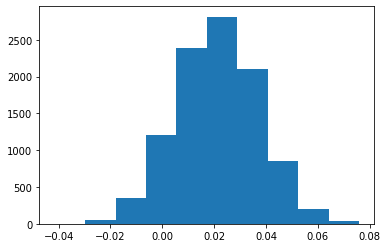

In [4]:
import matplotlib.pyplot as plt
diff=[]
for _ in range(10000):
    sample = df.sample(df.shape[0],replace=True)
    diff.append(sample[sample.group=="experiment"].completed.mean()-sample[sample.group=="control"].completed.mean())
plt.hist(diff)

(array([  14.,  107.,  624., 1849., 3071., 2717., 1281.,  291.,   42.,
           4.]),
 array([-0.06151723, -0.04864302, -0.03576882, -0.02289461, -0.0100204 ,
         0.0028538 ,  0.01572801,  0.02860222,  0.04147642,  0.05435063,
         0.06722484]),
 <a list of 10 Patch objects>)

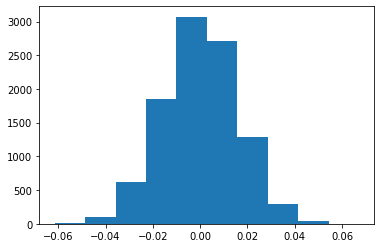

In [5]:
import numpy as np
diff = np.array(diff)
null = np.random.normal(0,diff.std(),diff.size)
plt.hist(null)

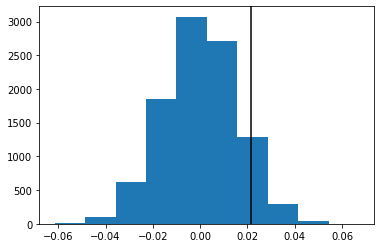

In [9]:
plt.hist(null)
plt.axvline(x=obs_diff, c='black')

In [10]:
(null>obs_diff).mean()

0.0864